# Evaluate the dimensionality reduction method

In [10]:
import os
import time
import pickle
import functools
import numpy as np
import math
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

from cluster import spectrum
import dr_utils
import nb_utils

from sklearn.utils import murmurhash3_32
from sklearn import metrics
from sklearn import random_projection


### Use the *falcon* method (hashing)

In [11]:
_min_mz, _max_mz = 101., 1500.
fragment_mz_tolerance = 0.05

### Exhaustive comparison of dimensionality reduction methods
For n_components = 800 (the default value in falcon).
Methods:
* hashing with murmurhash32 (default method of *falcon*);
* Gaussian projection;
* Sparse projection.

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

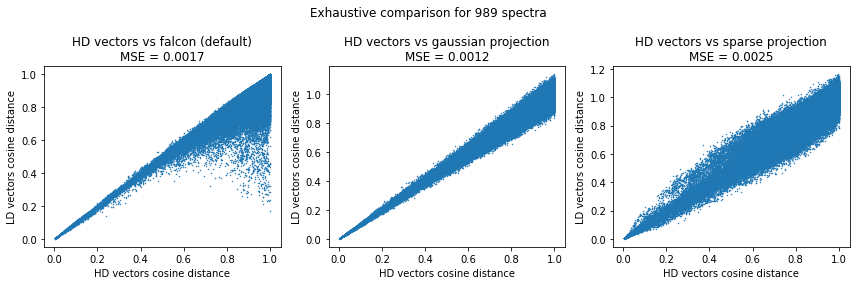

In [12]:
exportPath = os.path.abspath('dimensionReduction')
charge = 2
path = '/media/maesk/WD/falcon/PXD000561_all/spectra'
mz_split = 601 # The bucket to use
limit = 1000

sps = [nb_utils.process_spectrum(sp) for sp in nb_utils.read_spectra_from_bucket(charge, path, mz_split, limit)]
sps = [sp for sp in sps if sp is not None]

nsp = len(sps)

dirFig = os.path.join(exportPath, f'exhaust_charge{charge}_buck{mz_split}_{len(sps)}.png')
n_components = 800

methods = ['falcon (default)', 'gaussian projection', 'sparse projection']
reduct_func = [dr_utils.reduction_falcon, dr_utils.reduction_gaussian,
               dr_utils.reduction_sparse]
vec_hd = dr_utils.sp_to_vecHD(sps, _min_mz, _max_mz, fragment_mz_tolerance)
MSEs = dr_utils.compare_reductions(vec_hd, n_components, reduct_func, methods, dirFig)


### Non-exhaustive comparison